In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopandas.tools import geocode
from math import sqrt,radians,cos,sin,asin
import datetime as dte
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_csv('NYCTaxiFares.csv')

In [3]:
df.head(5)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [5]:
df.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [6]:
#Cheeking null values

df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Feature Engineering

In [8]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [9]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [10]:
#Calculating Distance from Latitude and Longitude using haversine formula

def dist(lo1,lo2,la1,la2):
    lo1=radians(lo1)
    lo2=radians(lo2)
    la1=radians(la1)
    la2=radians(la2)
    dlo=lo2-lo1
    dla=la2-la1
    a=sin(dla/2)**2+cos(la1)*cos(la2)*sin(dlo/2)**2
    c=2*asin(sqrt(a))
    r=6371
    return(round(c*r,2))
d=[]
for i in range(df.shape[0]):
    d.append(dist(df['pickup_latitude'][i],
                df['dropoff_latitude'][i],
                df['pickup_longitude'][i],
                df['dropoff_longitude'][i]))

In [11]:
df['Dist in kms']=d

In [12]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Dist in kms'],
      dtype='object')

In [13]:
#Dropping Lattitude and Longitude

df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],axis=1,inplace=True)

In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,Dist in kms
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46


In [15]:
#Extracting Week day from date time

week={0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}

df['day_name']=df['pickup_datetime'].dt.weekday.map(week)

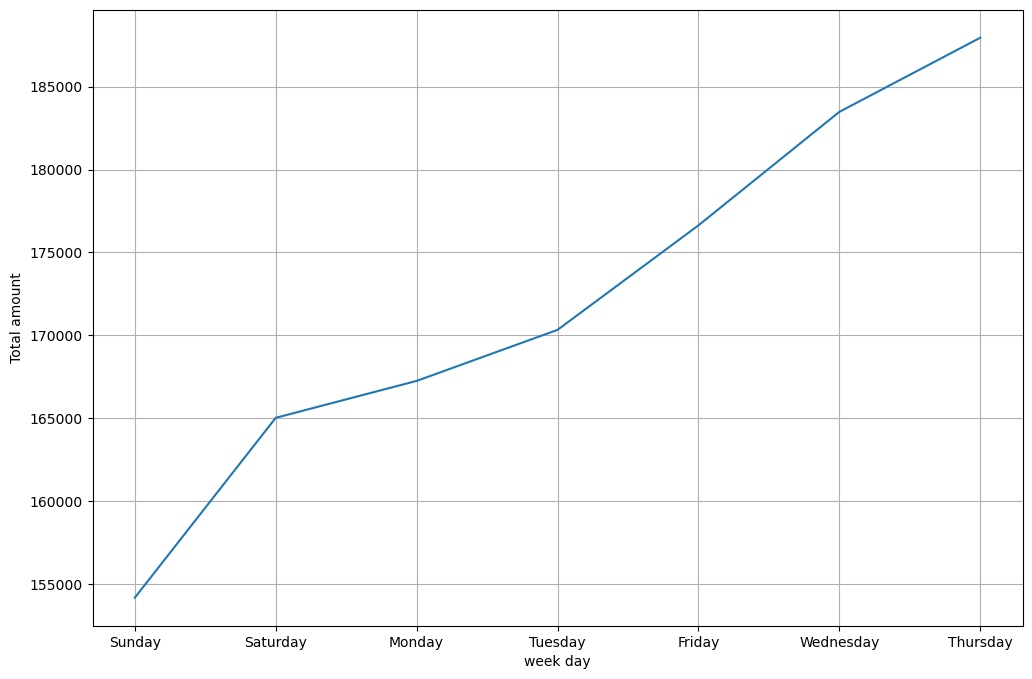

In [16]:
plt.figure(figsize=(12,8))
df.groupby('day_name')['fare_amount'].sum().sort_values().plot(kind='line')
plt.grid()
plt.xlabel('week day')
plt.ylabel('Total amount')
plt.show()

In [17]:
#Encoding days based on the plot

week_encoded={"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

df['day_name_ranked']=df['day_name'].map(week_encoded)

In [18]:
weekend_encode={"Sunday": 1, "Saturday": 1, "Monday": 0, "Tuesday": 0, "Friday": 0, "Wednesday": 0, "Thursday": 0}

df['IsWeekend']=df['day_name'].map(weekend_encode)

In [19]:
#creating hour column

df['Hour']=df['pickup_datetime'].dt.hour

In [20]:
#creating day of month wise column

df['day_of_month']=df['pickup_datetime'].dt.day

### Visualizations

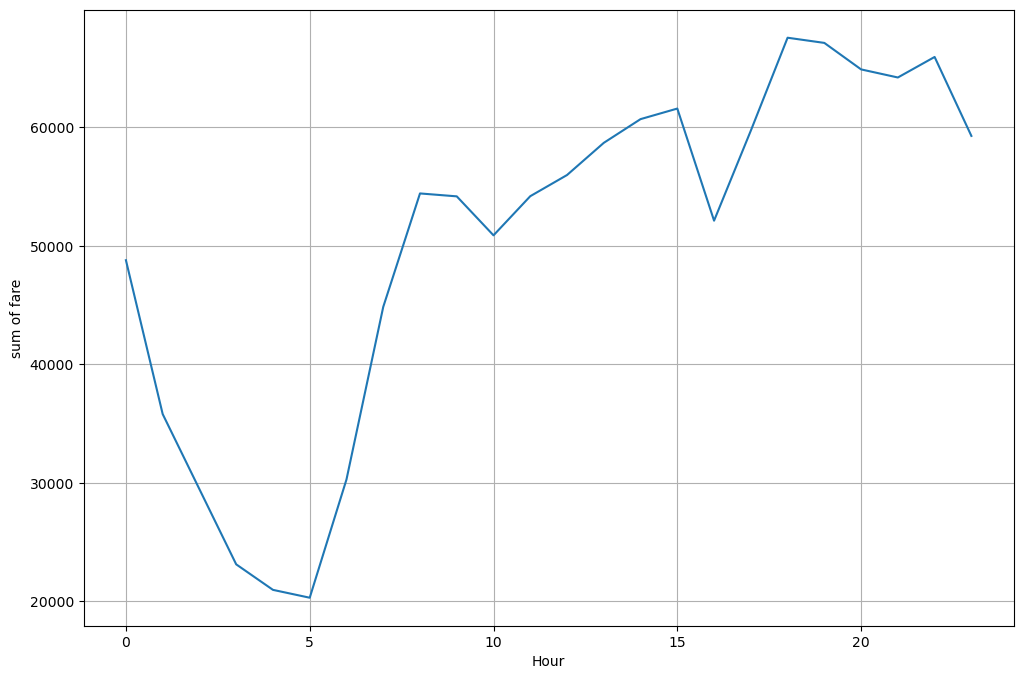

In [21]:
# hour wise fare amount

plt.figure(figsize=(12,8))
df.groupby('Hour')['fare_amount'].sum().plot()
plt.grid()
plt.xlabel('Hour')
plt.ylabel('sum of fare')
plt.show()

###### Highest fare collected was around 6:00pm UTC

###### 

In [22]:
#day wise total fare amount

date=[]
fare=[]
for day in list(df['pickup_datetime'].dt.day.sort_values().unique()):
    date.append('Date:'+str(day))
    fare.append(df[df.pickup_datetime.dt.day==day].fare_amount.sum())

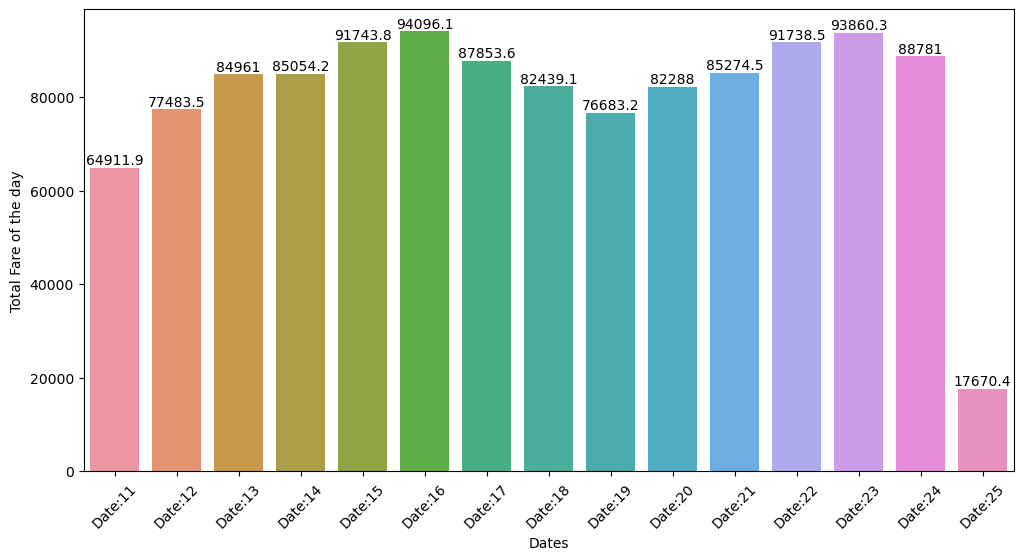

In [23]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=date,y=fare)
plt.xlabel('Dates')
plt.ylabel('Total Fare of the day')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

###### the Highest collection of fare was on 16th of that month which was (94096)

##### 

<AxesSubplot:xlabel='fare_class'>

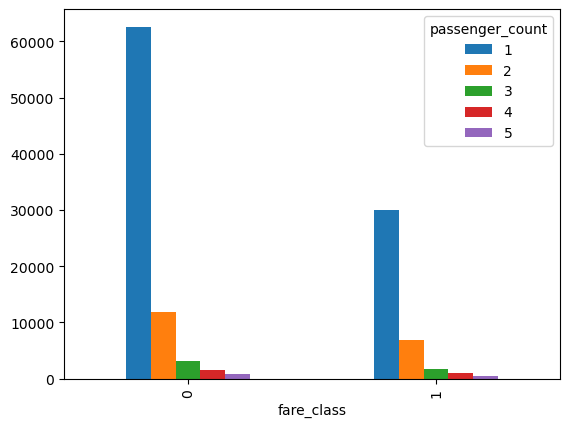

In [24]:
#no of booking by different class with different passeneger count

pd.crosstab(df['fare_class'],df['passenger_count']).plot(kind='bar')

##### Highest no. of rides requested was with class 0, and mostly all rides was with single rider

###### 

<AxesSubplot:xlabel='day_name', ylabel='Fare Amount'>

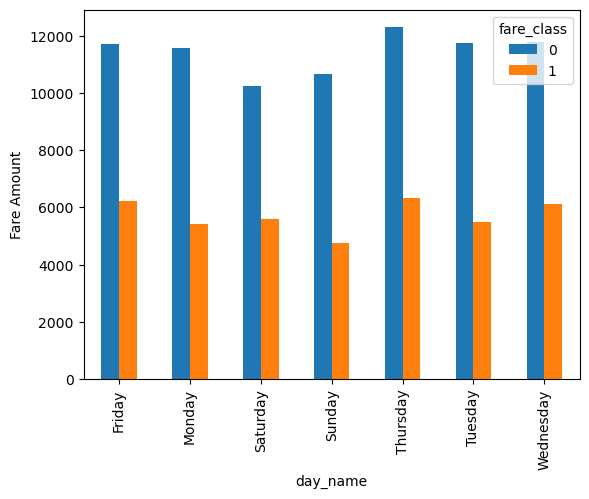

In [25]:
# Class wise total fare amount

pd.crosstab(df['day_name'],df['fare_class']).plot(kind='bar',ylabel='Fare Amount')

###### Highest fare amount of both fare class was collected on Thursday

#### 

<AxesSubplot:ylabel='fare_amount'>

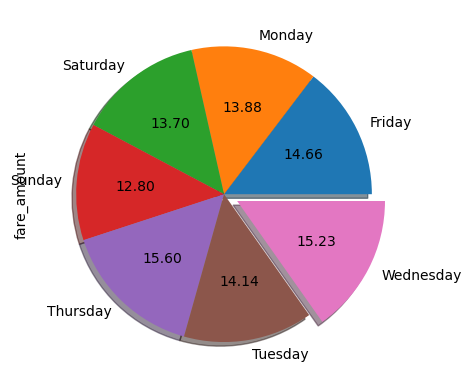

In [26]:
# Total Fare amount of different days in a week

df.groupby('day_name')['fare_amount'].sum().plot(
    kind='pie',autopct='%.2f',explode=[0,0,0,0,0,0,0.1]
    ,shadow=True)

<AxesSubplot:xlabel='Hour', ylabel='No. of Rides booked'>

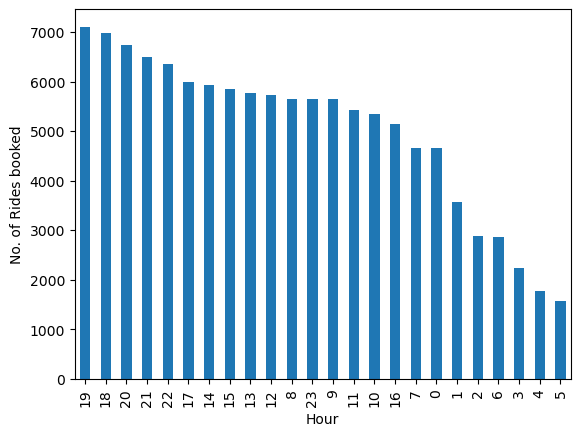

In [27]:
# Hour wise no. of rides booked

df['Hour'].value_counts().plot(kind='bar',xlabel='Hour'
                               ,ylabel='No. of Rides booked')

##### No. of rides was on peak by 7.00PM

In [28]:
# Function to determine hour type
def determine_hour_type(total_fare):
    if total_fare > 6000:
        return 'peak_hour'
    elif 2000 <= total_fare <= 6000:
        return 'medium_hour'
    else:
        return 'low_hour'

In [29]:
# Create new 'hour_type' column
df['hour_type'] = df.groupby('Hour')['fare_amount'].transform('sum').apply(determine_hour_type)

In [30]:
# Encoding the 'hour_type' column
hour_type_mapping = {'low_hour': 0, 'medium_hour': 1, 'peak_hour': 2}
df['hour_type'] = df['hour_type'].map(hour_type_mapping)


In [31]:
df.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,Dist in kms,day_name,day_name_ranked,IsWeekend,Hour,day_of_month,hour_type
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,Sunday,1,1,8,19,2
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,Friday,5,0,15,17,2
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,Friday,5,0,11,17,2
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,Saturday,2,1,21,11,2
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,Friday,5,0,2,17,2


##### 

In [32]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [33]:
df.head()

,fare_amount,fare_class,passenger_count,Dist in kms,day_name,day_name_ranked,IsWeekend,Hour,day_of_month,hour_type
0,6.5,0,1,1.93,Sunday,1,1,8,19,2
1,6.9,0,1,1.77,Friday,5,0,15,17,2
2,10.1,1,2,3.82,Friday,5,0,11,17,2
3,8.9,0,1,2.16,Saturday,2,1,21,11,2
4,19.7,1,1,9.46,Friday,5,0,2,17,2


In [34]:
df['Hour'].nunique()

24

<AxesSubplot:xlabel='fare_amount'>

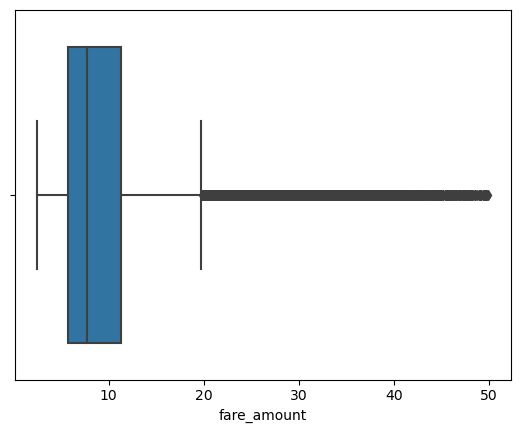

In [35]:
# Outliers detection
sns.boxplot(df['fare_amount'])


In [36]:
#Outlier treatment

##1st and 3rd quarile
Q1, Q3 =np.percentile(df['fare_amount'], [25,75])
print(Q1,Q3)

5.7 11.3


In [37]:
##lower and upper frnce of outlier
IQR=Q3-Q1
upper_fence = Q3+1.5*IQR
lower_fence = Q1-1.5*IQR

In [38]:
outliers=[]

In [39]:
## detecting outlier
for i in df['fare_amount']:
        fare_float = float(i)
        if fare_float < lower_fence or fare_float > upper_fence:
            outliers.append(fare_float)


In [40]:
print(len(outliers))

9353


In [41]:
df = df[(df['fare_amount'] > lower_fence) & (df['fare_amount'] < upper_fence)]


<AxesSubplot:xlabel='fare_amount'>

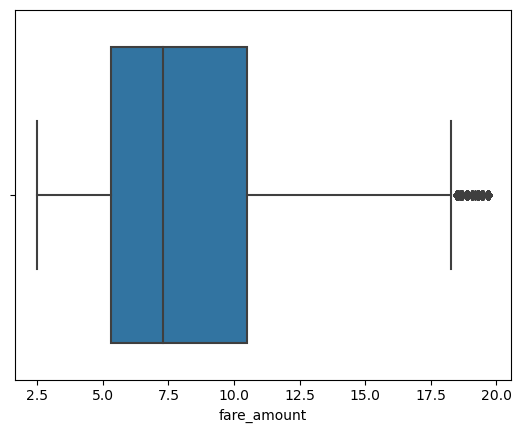

In [42]:
sns.boxplot(df['fare_amount'])

<AxesSubplot:xlabel='Dist in kms'>

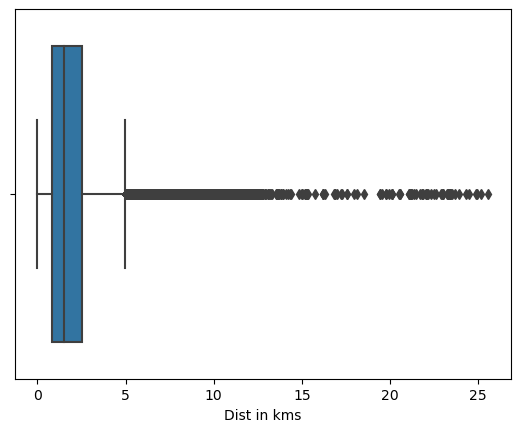

In [43]:
sns.boxplot(df['Dist in kms'])

In [44]:
##1st and 3rd quarile
q1, q3 =np.percentile(df['Dist in kms'], [25,75])
print(q1,q3)

0.85 2.51


In [45]:
##lower and upper frnce of outlier
Iqr=q3-q1
upper_fence2 = q3+1.5*Iqr
lower_fence2 = q1-1.5*Iqr

In [46]:
outliers2=[]

In [47]:
## detecting outlier
for i in df['Dist in kms']:
        dist_float = float(i)
        if dist_float < lower_fence2 or dist_float > upper_fence2:
            outliers2.append(dist_float)

In [48]:
len(outliers2)

4745

In [49]:
df = df[(df['Dist in kms'] > lower_fence2) & (df['Dist in kms'] < upper_fence2)]

In [50]:
df['fare_amount'].count()

105902

In [51]:
# Standarization

In [52]:
from sklearn.preprocessing import MinMaxScaler


In [53]:
# Extract the columns to be standardized
columns_to_standardize = ['Dist in kms', 'fare_amount', 'passenger_count']
data_to_standardize = df[columns_to_standardize]

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data
df[columns_to_standardize] = scaler.fit_transform(data_to_standardize)


In [54]:
# Display the DataFrame with standardized column
df.head()

,fare_amount,fare_class,passenger_count,Dist in kms,day_name,day_name_ranked,IsWeekend,Hour,day_of_month,hour_type
0,0.232558,0,0.00,0.386774,Sunday,1,1,8,19,2
1,0.255814,0,0.00,0.354709,Friday,5,0,15,17,2
2,0.441860,1,0.25,0.765531,Friday,5,0,11,17,2
3,0.372093,0,0.00,0.432866,Saturday,2,1,21,11,2
5,0.325581,0,0.00,0.126253,Wednesday,6,0,8,22,2


In [55]:
from scipy.stats import skew

# Calculate skewness
fare_amount_skewness = skew(df['fare_amount'])

# Display the skewness
print(f"Skewness of fare_amount: {fare_amount_skewness}")

Skewness of fare_amount: 0.9868279662728698


In [56]:
df.head()

,fare_amount,fare_class,passenger_count,Dist in kms,day_name,day_name_ranked,IsWeekend,Hour,day_of_month,hour_type
0,0.232558,0,0.00,0.386774,Sunday,1,1,8,19,2
1,0.255814,0,0.00,0.354709,Friday,5,0,15,17,2
2,0.441860,1,0.25,0.765531,Friday,5,0,11,17,2
3,0.372093,0,0.00,0.432866,Saturday,2,1,21,11,2
5,0.325581,0,0.00,0.126253,Wednesday,6,0,8,22,2


### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
columns_to_drop = ['fare_amount', 'day_name', 'day_name_ranked', 'Hour', 'day_of_month']
x = df.drop(columns=columns_to_drop, axis=1)

In [75]:
x.head()

,fare_class,passenger_count,Dist in kms,IsWeekend,hour_type
0,0,0.00,0.386774,1,2
1,0,0.00,0.354709,0,2
2,1,0.25,0.765531,0,2
3,0,0.00,0.432866,1,2
5,0,0.00,0.126253,0,2


In [59]:
y=df['fare_amount']

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [61]:
#User-defined function for evaluation metrics

def reg_metrics(actual,pred):
    r2=r2_score(actual,pred)
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    rmse=mean_squared_error(actual,pred,squared=False)
    print('R^2 Error : ',round(r2,4))
    print('MSE  : ',round(mse,4))
    print('MAE  : ',round(mae,4))
    print('RMSE : ',round(rmse,4),'\n')

### Model Building

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score

##### Linear Regression

In [63]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
train_lr=lr.predict(xtrain)
test_lr=lr.predict(xtest)
reg_metrics(ytrain,train_lr)
reg_metrics(ytest,test_lr)

R^2 Error :  0.739
MSE  :  0.01
MAE  :  0.0787
RMSE :  0.1001 

R^2 Error :  0.7387
MSE  :  0.0101
MAE  :  0.0792
RMSE :  0.1005 



##### Decision Tree

In [64]:
dt=DecisionTreeRegressor(max_depth=9,min_samples_split=15,min_samples_leaf=15)
dt.fit(xtrain,ytrain)
train_dt=dt.predict(xtrain)
test_dt=dt.predict(xtest)
reg_metrics(ytrain,train_dt)
reg_metrics(ytest,test_dt)

R^2 Error :  0.7607
MSE  :  0.0092
MAE  :  0.0749
RMSE :  0.0959 

R^2 Error :  0.7567
MSE  :  0.0094
MAE  :  0.076
RMSE :  0.097 



##### Random Forest

In [65]:
rf=RandomForestRegressor(n_estimators=300,n_jobs=-1,max_depth=17,min_samples_split=17,min_samples_leaf=17)
rf.fit(xtrain,ytrain)
train_rf=rf.predict(xtrain)
test_rf=rf.predict(xtest)
reg_metrics(ytrain,train_rf)
reg_metrics(ytest,test_rf)

R^2 Error :  0.7651
MSE  :  0.009
MAE  :  0.0742
RMSE :  0.095 

R^2 Error :  0.7563
MSE  :  0.0094
MAE  :  0.0761
RMSE :  0.0971 



##### AdaBoost

In [66]:

ada=AdaBoostRegressor(learning_rate=0.01,n_estimators=100)
ada.fit(xtrain,ytrain)
train_ada=ada.predict(xtrain)
test_ada=ada.predict(xtest)
reg_metrics(ytrain,train_ada)
reg_metrics(ytest,test_ada)

R^2 Error :  0.75
MSE  :  0.0096
MAE  :  0.0776
RMSE :  0.098 

R^2 Error :  0.7498
MSE  :  0.0097
MAE  :  0.0782
RMSE :  0.0984 



##### Gradient Boost

In [67]:
gb=GradientBoostingRegressor(n_estimators=200,max_depth=6,min_samples_split=13,min_samples_leaf=14)
gb.fit(xtrain,ytrain)
train_gb=gb.predict(xtrain)
test_gb=gb.predict(xtest)
reg_metrics(ytrain,train_gb)
reg_metrics(ytest,test_gb)

R^2 Error :  0.7628
MSE  :  0.0091
MAE  :  0.0746
RMSE :  0.0954 

R^2 Error :  0.7578
MSE  :  0.0094
MAE  :  0.0758
RMSE :  0.0968 



##### Plotting the scores of all models

In [68]:
acc=pd.DataFrame({'models':['Linear Reg','Dtree','Random forest','AdaBoost','Gradient Boost'],
                  'r2':[round(r2_score(ytest,test_lr),2),round(r2_score(ytest,test_dt),2),round(r2_score(ytest,test_rf),2),round(r2_score(ytest,test_ada),2),round(r2_score(ytest,test_gb),2)]})
acc.sort_values(inplace=True,by='r2')

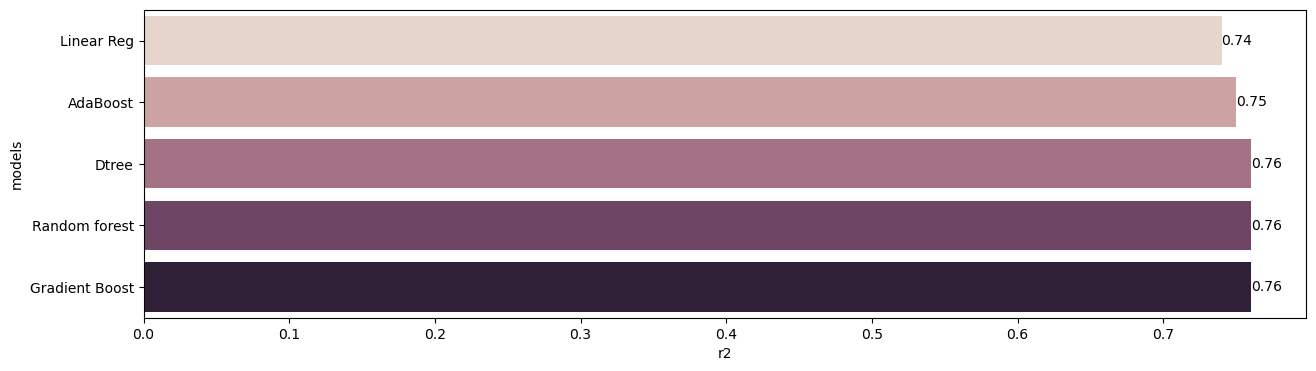

In [69]:
plt.figure(figsize=(15,4))
ax=sns.barplot(x='r2',y='models',data=acc,palette='ch:.120')
ax.bar_label(ax.containers[0])
plt.show()

##### Both Gradient Boost and Random forest works well

###### User-defined function for finding latitude and longitude from location entered by user

In [70]:
def lon_lat(pickup,drop):
    pick = geocode(pickup)
    drp=geocode(drop)
    pick_point = pick.geometry.iloc[0]
    drp_point=drp.geometry.iloc[0]
    pick_lat, pick_lon = pick_point.y, pick_point.x
    drp_lat,drop_lon=drp_point.y,drp_point.x
    return dist(pick_lon,drop_lon,pick_lat,drp_lat)

###### User Defined function for finding current day, hour, month for passing to the model

In [71]:
def dtime():
    curr=dte.datetime.now()
    month=curr.day
    Hour=curr.hour
    wd=pd.Series([curr.strftime('%A')])
    wd=wd.map(week_encoded)
    day_name=wd[0]
    return day_name,Hour,month

In [72]:
#creating Pickle

model_filename = 'E:/Ivy/Ivy_Python/Machine Learning/ML_projects/random_forest_regression_model.pkl'

In [73]:
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

In [74]:
import os
print(os.getcwd())

C:\Users\SAYAN
